**Topic:**        Challenge Set 5  
**Subject:**      Linear Regression and Train/Test Split challenges  
**Date:**         10/8/2017  
**Name:**         Laura Howard

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LinearRegression

In [2]:
with open("2013_movies.csv", "r") as f:
    df = pd.DataFrame.from_csv(f)

In [3]:
df.head()

,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
Title,,,,,,
The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [4]:
df.shape

(100, 6)

In [5]:
df.describe()

,Budget,DomesticTotalGross,Runtime
count,8.900000e+01,1.000000e+02,100.000000
mean,7.474719e+07,1.005969e+08,112.260000
std,5.941692e+07,8.739641e+07,18.190696
min,2.500000e+06,2.556825e+07,75.000000
25%,2.800000e+07,4.270413e+07,98.000000
50%,5.500000e+07,6.954237e+07,112.000000
75%,1.100000e+08,1.204759e+08,123.000000
max,2.250000e+08,4.246680e+08,180.000000


In [6]:
df.isnull().sum()

Budget                11
DomesticTotalGross     0
Director               4
Rating                 0
Runtime                0
ReleaseDate            0
dtype: int64

In [8]:
# Replacing missing Busget values with the mean for the column
df['Budget'].fillna(df.Budget.mean(), inplace=True)

In [9]:
df.isnull().sum()

Budget                0
DomesticTotalGross    0
Director              4
Rating                0
Runtime               0
ReleaseDate           0
dtype: int64

In [10]:
df.dtypes

Budget                float64
DomesticTotalGross      int64
Director               object
Rating                 object
Runtime                 int64
ReleaseDate            object
dtype: object

### Challenge 1

In [11]:
df['Predictor'] = 1

In [12]:
X = df

y = df['DomesticTotalGross']

In [13]:
lr_model1 = LinearRegression()
lr_model1.fit(X.loc[:,['Predictor']],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
lr_model1.score(X.loc[:,['Predictor']], y)

0.0

In [15]:
lr_model1.score(X.loc[:,['Predictor']], y)

0.0

In [16]:
test_set_pred1 = lr_model1.predict(X.loc[:,['Predictor']])
test_set_pred1

array([  1.00596875e+08,   1.00596875e+08,   1.00596875e+08,
         1.00596875e+08,   1.00596875e+08,   1.00596875e+08,
         1.00596875e+08,   1.00596875e+08,   1.00596875e+08,
         1.00596875e+08,   1.00596875e+08,   1.00596875e+08,
         1.00596875e+08,   1.00596875e+08,   1.00596875e+08,
         1.00596875e+08,   1.00596875e+08,   1.00596875e+08,
         1.00596875e+08,   1.00596875e+08,   1.00596875e+08,
         1.00596875e+08,   1.00596875e+08,   1.00596875e+08,
         1.00596875e+08,   1.00596875e+08,   1.00596875e+08,
         1.00596875e+08,   1.00596875e+08,   1.00596875e+08,
         1.00596875e+08,   1.00596875e+08,   1.00596875e+08,
         1.00596875e+08,   1.00596875e+08,   1.00596875e+08,
         1.00596875e+08,   1.00596875e+08,   1.00596875e+08,
         1.00596875e+08,   1.00596875e+08,   1.00596875e+08,
         1.00596875e+08,   1.00596875e+08,   1.00596875e+08,
         1.00596875e+08,   1.00596875e+08,   1.00596875e+08,
         1.00596875e+08,

In [17]:
y.mean()

100596875.22

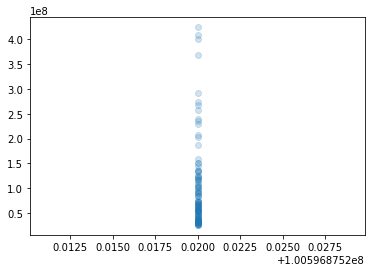

In [19]:
# Plot actual versus predicted
plt.scatter(test_set_pred1,y,alpha=.2);

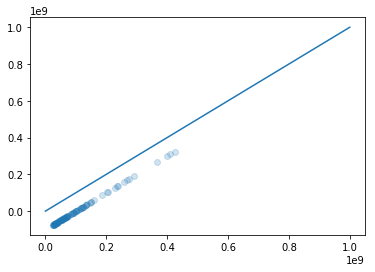

In [20]:
# Plot residuals
plt.scatter(y,y-test_set_pred1,alpha=.2)
plt.plot(np.linspace(0,1000000000,1000),np.linspace(0,1000000000,1000));

In [21]:
lr_model1.coef_

array([ 0.])

The results of this model (score and plot of actuals vs predicted) show that there is no correlation between the feature (column of 1s) and the outcome of interest (domestic total gross). The model provides the mean of training data for every prediction because the predictor value is the same for all data points.

### Challenge 2

In [22]:
selected_columns_1 = ['Budget']

In [23]:
lr_model2 = LinearRegression()
lr_model2.fit(X.loc[:,selected_columns_1],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
lr_model2.score(X.loc[:,selected_columns_1], y)

0.25294062651022153

In [26]:
test_set_pred2 = lr_model2.predict(X.loc[:,selected_columns_1])

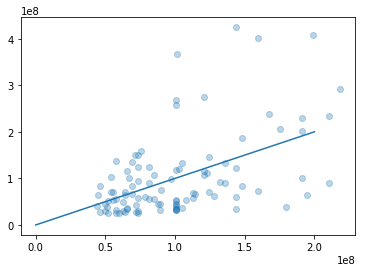

In [27]:
# Plot actual versus predicted
plt.scatter(test_set_pred2,y,alpha=.3)
plt.plot(np.linspace(0,200000000,1000),np.linspace(0,200000000,1000));

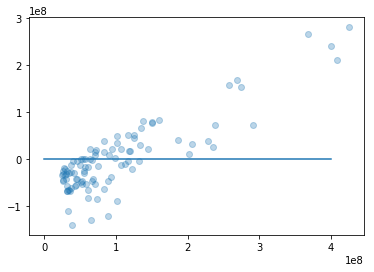

In [28]:
# Plot residuals
plt.scatter(y,y-test_set_pred2,alpha=.3)
plt.plot(np.linspace(0,400000000,1000),np.linspace(0,0,1000));

In [29]:
list(zip(selected_columns_1,lr_model2.coef_))

[('Budget', 0.78463743129566854)]

This model shows that there is a positive correlation between budget and total domestic gross. As a 2013 movie's budget increases by 1 dollar, it's  total domestic gross increases by ~$.78. However, the model doesn't perform well on extreme data points.

### Challenge 3

In [30]:
df_rating = pd.get_dummies(df['Rating'])

In [31]:
df = pd.concat([df, df_rating], axis=1)
df.head()

,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Predictor,G,PG,PG-13,R
Title,,,,,,,,,,,
The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1,0,0,1,0
Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1,0,0,1,0
Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1,0,1,0,0
Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1,0,1,0,0
Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1,0,0,1,0


In [32]:
X = df

y = df['DomesticTotalGross']

In [33]:
selected_columns_2 = ['Budget', 'G', 'PG', 'PG-13', 'R']

In [34]:
lr_model3 = LinearRegression()
lr_model3.fit(X.loc[:,selected_columns_2],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
lr_model3.score(X.loc[:,selected_columns_2], y)

0.29784551526566827

In [36]:
test_set_pred3 = lr_model3.predict(X.loc[:,selected_columns_2])

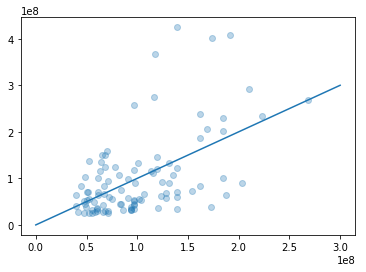

In [37]:
# Plot actual versus predicted
plt.scatter(test_set_pred3,y,alpha=.3)
plt.plot(np.linspace(0,300000000,1000),np.linspace(0,300000000,1000));

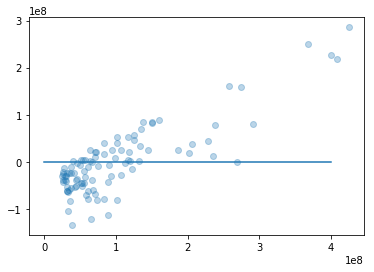

In [38]:
# Plot residuals
plt.scatter(y,y-test_set_pred3,alpha=.3)
plt.plot(np.linspace(0,400000000,1000),np.linspace(0,0,1000));

In [39]:
list(zip(selected_columns_2,lr_model3.coef_))

[('Budget', 0.75508125686153771),
 ('G', 124430567.78994916),
 ('PG', -27413576.602277711),
 ('PG-13', -47013034.381701373),
 ('R', -50003956.805970147)]

Same as the previous, this model shows that there is a positive correlation between budget and total domestic gross and this model is able to explain even more of the variability.  Additionally, the new model suggests that G films tend to be much higher grossing than the other ratings. Again, the model doesn't perform well on extreme data points though.

### Challenge 4

In [40]:
# Grabbed list of top 25 directors or all time from IMBD to create a binary top director feature
Top_25_Directors = ['Steven Spielberg', 'Martin Scorsese', 'Alfred Hitchcock', 'Stanley Kubrick',
                    'Francis Ford Coppola', 'Woody Allen', 'Billy Wilder', 'John Huston', 'Peter Jackson', 
                    'Milos Forman', 'Clint Eastwood', 'David Lean', 'Ingmar Bergman', 'Joel Coen',
                    'John Ford', 'James Cameron', 'Sidney Lumet', 'Charles Chaplin', 'Tim Burton',
                    'Roman Polanski', 'Quentin Tarantino', 'Danny Boyle', 'Ridley Scott', 'David Fincher',
                    'Christopher Nolan']

In [41]:
df['TopDirector'] = 0

In [42]:
df.loc[df["Director"].isin(Top_25_Directors), "TopDirector"] = 1

In [43]:
import datetime as dt
import dateutil.parser

In [45]:
# Converting Release Date to a date time format and extracting the Release Month to add as a feature for my model
df['ReleaseDate'] = df['ReleaseDate'].map(dateutil.parser.parse)
df['ReleaseMonth'] = df['ReleaseDate'].dt.month

In [46]:
# Adding Runtime to the model as well as the other two features I just created
selected_columns_3 = ['Budget', 'Runtime', 'TopDirector', 'ReleaseMonth', 'G', 'PG', 'PG-13', 'R']

In [47]:
X = df

y = df['DomesticTotalGross']

In [48]:
lr_model4 = LinearRegression()
lr_model4.fit(X.loc[:,selected_columns_3],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
lr_model4.score(X.loc[:,selected_columns_3], y)

0.33350719813406582

In [50]:
test_set_pred4 = lr_model4.predict(X.loc[:,selected_columns_3])

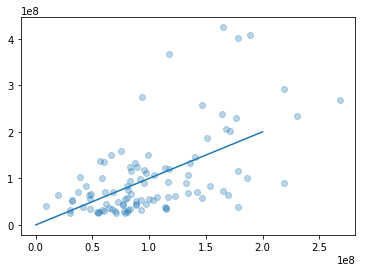

In [51]:
# Plot actual versus predicted
plt.scatter(test_set_pred4,y,alpha=.3)
plt.plot(np.linspace(0,200000000,1000),np.linspace(0,200000000,1000));

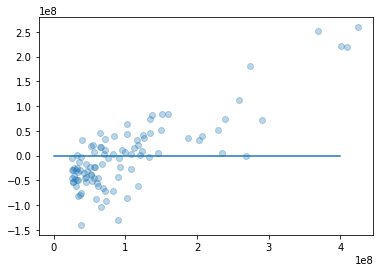

In [52]:
# Plot residuals
plt.scatter(y,y-test_set_pred4,alpha=.3)
plt.plot(np.linspace(0,400000000,1000),np.linspace(0,0,1000));

In [53]:
list(zip(selected_columns_3,lr_model4.coef_))

[('Budget', 0.65193351918010878),
 ('Runtime', 921647.9003336241),
 ('TopDirector', 2329223.1135338917),
 ('ReleaseMonth', 1055125.2656559127),
 ('G', 126844855.85515405),
 ('PG', -18125161.606695954),
 ('PG-13', -53472902.85280364),
 ('R', -55246791.395654418)]

This newest model did a bit better at predicting and was able to explain even more variation in the data. Now that other features are included, the coeficient for Budget decreases. Longer runtime, top directors, and later release months (within the year) tends to predict higher dometic gross.

### Challenge 5

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [56]:
lr_model5 = LinearRegression()
lr_model5.fit(X_train.loc[:,selected_columns_3],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
lr_model5.score(X_test.loc[:,selected_columns_3], y_test)

0.30904661110837039

In [58]:
lr_model5.score(X_train.loc[:,selected_columns_3], y_train)

0.27531731345029209

In [59]:
test_set_pred5 = lr_model5.predict(X_test.loc[:,selected_columns_3])

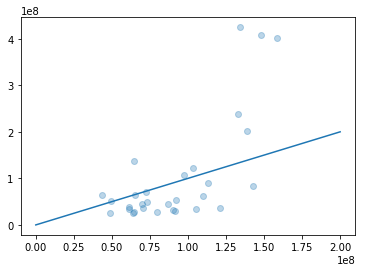

In [60]:
# Plot actual versus predicted
plt.scatter(test_set_pred5,y_test,alpha=.3)
plt.plot(np.linspace(0,200000000,1000),np.linspace(0,200000000,1000));

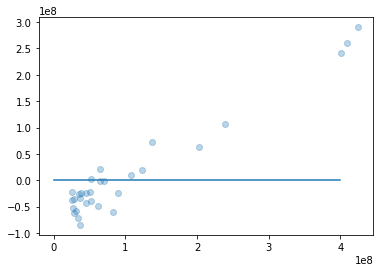

In [61]:
# Plot residuals
plt.scatter(y_test,y_test-test_set_pred5,alpha=.3)
plt.plot(np.linspace(0,400000000,1000),np.linspace(0,0,1000));

Even with a train/test split, the model still had roughly the same predictive ability.